# Evaluation and Metric
Even when making predictions or classifications using machine learning, it is necessary to evaluate their performance. Visualization can give you an overview of prediction accuracy, but further detailed examination is needed.
Here, we will discuss and explain evaluation metrics for regression, such as mean squared error (MSE) and mean absolute error (MAE), as well as evaluation metrics for classification performance, such as confusion matrix, precision, and so on.

## Evaluation methods
Essentially, in order to evaluate the performance of regression or classification, it is necessary to assess whether the predictions are correct for all possible data.
However, it is impossible to prepare all possible data previously, and if it were possible, there would be no need to use machine learning for prediction.
Therefore, in machine learning, training data and test data are prepared in advance.
The predictor trained with the training data is then evaluated to see if it can make correct predictions.
It is important that both the training and test data sufficiently represent the field in which you want to apply the predictor.
n other words, to examine the general performance with a small amount of data, it is important that the training data and test data are appropriately sampled as representatives of the entire data set.
(It has a strong relationship with the idea of random sampling in statistics.)

In practice, when using machine learning, there is often a limited amount of pre-existing labeled data.
On one hand, you want to use as much data as possible for training the model, while on the other hand, you want to evaluate the model's performance on as much diverse data as possible.
There is a trade-off that needs to be considered.

### Hold-out
When there is a sufficient amount of data available, it's simple to split the data into training and testing sets for evaluation.
Generally, in order to train the model efficiently, a larger portion of the data is allocated to the training set.
The following figure shows hold-out.

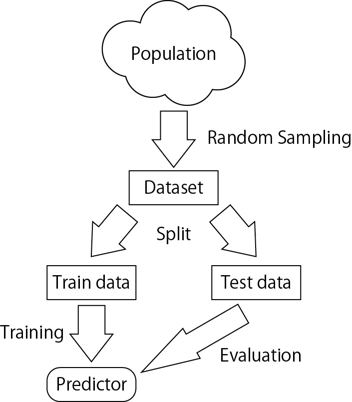

In [1]:
from PIL import Image

im = Image.open('hold-out.jpg')
im.resize((im.width // 2, im.height // 2))

The problem with the hold-out is that it relies on a single split of the training and test data for evaluation.
When the collected data is divided, the distribution of the data inevitably is biased due to the reduced number of data points, a phenomenon well known in statistics.
Therefore, even if a predictor trained on a randomly selected training dataset shows good performance on a randomly selected test dataset, it cannot be trusted.
In other words, the bias of the training and test data cannot be ignored.
In statistics, an average is used to mitigate such bias.
That is, by conducting multiple trials and averaging the results, the true performance can be evaluated.
Cross-validation is designed based on this concept.

### Cross validation
In cross validation, the dataset is predivided into several subsets.
Then, one of those subsets is used as test data, and the remaining subsets are used as training data to train the predictor.
In this case, the choice of test data exists for the number of divisions ($n$), so $n$ trials can be conducted.
Therefore, by taking the average of the performance evaluations from the $n$ trials, it is possible to evaluate the prediction performance with less bias.

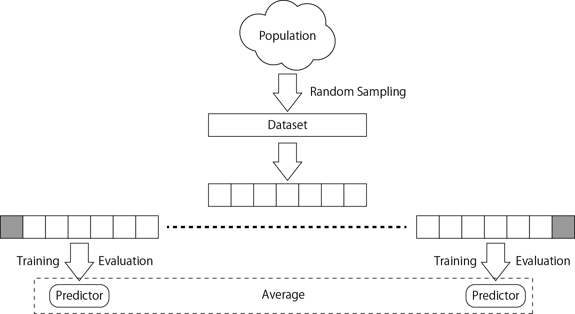

In [5]:
from PIL import Image

im = Image.open('crossvalidation.jpg')
im.resize((im.width // 3, im.height // 3))

### Leave-one-out
Leave-one-out is an extreme case of cross-validation.
In leave-one-out, only one data is used as test data, and the rest of the data is used as training data.
It means that when the dataset is small, a large amount of training data can be used.
Leave-one-out can essentially be considered a variation of cross-validation.

## Evaluation for Regression
In regression, the difference between the predicted value and the true value is evaluated.
To evaluate the magnitude of the difference, absolute values or squared values are used to ignore the sign.
Therefore, mean absolute error (MAE), mean squared error (MSE), and root mean squared error (RMSE) are used as evaluation methods.
Below are the formulas
$$ {\rm MAE} = \frac{1}{N} \sum_{i=1}^N |y_i - \hat{y}_i |$$
$$ {\rm MSE} = \frac{1}{N} \sum_i (y_i - \hat{y}_i )^2$$
$$ {\rm RMSE} = \sqrt{\frac{1}{N} \sum_i (y_i - \hat{y}_i )^2} $$
Both MAE, MSE, and RMSE are good when they have smaller values.

## Evaluation for Classification
In classification, there are cases where the prediction is correct and cases where the prediction is incorrect.
This situation can be written in a table as follows.
In binary classification, all combinations of predicted values and true values are represented in the following table.

| |P |N |
|:--:|:--:|:--:|
|P|TP|FN|
|N|FP|TN|

When the table represented as a matrix, the matrix is known as a confusion matrix.
In the confusion matrix, the diagonal elements represent the correctly classified data.
Therefore, a good predictor is one for which the proportion of the diagonal elements is large.

The evaluation metrics, which are quantified based on the confusion matrix, include the following metrics.
$$ {\rm Precisin} = \frac{TP}{TP+FP} $$
$$ {\rm Recall} = \frac{TP}{TP+FN} $$
$$ {\rm Accuracy} = \frac{TP+TF}{TP+FP+FN+TF} $$
$$ {\rm False~Positive~Rate(FPR)} = \frac{FP}{FP+TN} $$
$$ {\rm True~Positive~Rate(TPR)} = \frac{TP}{TP+FN} $$
Precision is the proportion of positive predictions that were actually correct.
Recall is the proportion of actual positive predictions that were correctly predicted.
Accuracy is the proportion of both positive and negative predictions that were correctly predicted.
FPR and TPR are evaluation metrics that are commonly used in tests and screenings.

In machine learning, precision and recall are frequently used.
However, it is challenging to evaluate these two metrics separately, so we consider the F-measure, a new evaluation metric that combines them.
$$ {\rm F-measure} = \frac{2}{\frac{1}{\rm Precision}+\frac{1}{\rm Recall}} $$
F-measure is calculated as the harmonic mean of precision and recall.

## Experiments
We will discuss validation with Breast Cancer Wisconsin Dataset.
First, split the dataset into training data and test data.
Then, use the training data to train the model and evaluate it using the test data.

In [19]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron

# Download Breast Cancer Wisconsine Dataset
data_cancer = load_breast_cancer()
# Split the dataset into training data and test data
X_train, X_test, Y_train, Y_test = train_test_split(data_cancer['data'], data_cancer['target'], train_size=.7, test_size=.3)
# Construct a linear model
lc = Perceptron()
lc.fit(X_train, Y_train)
Y_pred = lc.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
print('Confusion matrix')
print(confusion_matrix(Y_test, Y_pred))
print('Accuracy:', accuracy_score(Y_test, Y_pred))
print('Recall:', recall_score(Y_test, Y_pred))
print('Precision:', precision_score(Y_test, Y_pred))

Confusion matrix
[[63 11]
 [ 4 93]]
Accuracy: 0.9122807017543859
Recall: 0.9587628865979382
Precision: 0.8942307692307693


Use 5-fold cross-validation to evaluate the performance of the classifier.
The "cross_val_score" function provided by Scikit-learn calculates the accuracy for each of the five subsets.

In [25]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lc, data_cancer['data'], data_cancer['target'], cv=5)
print(scores)
print(sum(scores) / len(scores))

[0.92982456 0.88596491 0.87719298 0.87719298 0.84955752]
0.883946592144077


## Assignment
Evaluate the classifier for the Iris Dataset that you created yesterday using 5-fold cross-validation.
Additionally, Discuss the differences when evaluated multiple times with different splits using the hold-out method.